## Telemarketing-campaign-sales-Forecasting

IMPORT NECESSARY PACKAGES

In [1]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import pathlib

LOAD THE EXCEL FILE INTO A DATAFRAME

In [2]:
FILE_PATH = pathlib.Path.cwd().joinpath('Office_Supply_Campaign_Results.xlsx')
df = pd.read_excel(FILE_PATH)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN


In [3]:
df.describe()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket
count,1.617200e+04,16172.000000,1.617200e+04,16172.000000,16172.000000,16172.000000,16172.000000
mean,2.070406e+07,245.896967,6.716763e+05,14.483119,0.107841,0.211848,0.097638
std,1.898585e+07,720.317450,9.566271e+05,8.031293,0.310189,0.408630,0.296834
min,8.673400e+04,-566.500000,-1.643031e+05,1.000000,0.000000,0.000000,0.000000
25%,9.100472e+06,0.000000,1.900188e+05,8.000000,0.000000,0.000000,0.000000
50%,1.807196e+07,0.000000,3.965039e+05,16.000000,0.000000,0.000000,0.000000
75%,2.712137e+07,145.669048,7.876159e+05,20.000000,0.000000,0.000000,0.000000
max,1.672359e+08,8936.850000,3.441213e+07,313.000000,1.000000,1.000000,1.000000


In [4]:
df.shape

(16173, 21)

CLEANING THE DATA

In [5]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

In [6]:
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,...,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN


In [7]:
#pd.get_dummies(df.drop('date_of_first_purchase', axis = 1))

CREATING THE TARGET & EXPLANATORY VARIABLE

In [8]:
# X = df.dropna()

In [9]:
X = df.drop('campaign_period_sales', axis = 'columns')
y = df['campaign_period_sales']

PREPROCESS THE DATA

In [10]:
def office_store_preprocess(X):
    to_drop = ['date_of_first_purchase', 'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket']
    to_bool = ['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies']
    
    # function to convert to bool
    def convert_fill_bool(val):
        if val == 'Y': return 1
        elif val == 'YY': return 1
        else: return 0
        
    X_trans = X.drop(to_drop, axis='columns')
    
    for col in to_bool:
        X_trans[col] = X_trans[col].apply(convert_fill_bool)
    return X_trans

In [11]:
X = office_store_preprocess(X)
df = pd.concat([y,X], axis = 'columns')
# .dropna()
df.head()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,238.704762,86734.0,146803.428571,15.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,6-10,English
1,281.680000,97098.0,439984.160000,22.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,11-50,English
2,432.857143,100836.0,970465.714286,19.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,6-10,English
3,0.000000,116390.0,230193.600000,17.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,1-5,English
4,1370.166667,127914.0,27403.333333,21.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 17 columns):
campaign_period_sales                16172 non-null float64
customer_number                      16172 non-null float64
historical_sales_volume              16172 non-null float64
number_of_prior_year_transactions    16172 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             15730 non-null object
desk                                 16173 non-null int64
executive_chair                      16173 non-null int64
standard_chair                       16173 non-null int64
monitor                              16173 non-null int64
printer                              16173 non-null int64
computer                             16173 non-null int64
insurance                            16173 non-null int64
toner                                16173 non-null int64
office_supplies                      16173 non-null int64
number_of_e

AT A GLANCE WE CAN SEE THAT THE LAST THREE COLUMNS HAVE SOME MISSING VALUES

BELOW IS AN IN DEPTH LOOK INTO THE 'last_transaction_channel' COLUMN

In [13]:
df['last_transaction_channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: last_transaction_channel, dtype: int64

FILL MISSING VALUES WITH UNKNOWNS

In [14]:
df['last_transaction_channel'] = df['last_transaction_channel'].fillna('unknown')

In [15]:
df['last_transaction_channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
unknown            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: last_transaction_channel, dtype: int64

BELOW IS AN IN DEPTH LOOK INTO THE 'number_of_employees' COLUMN

In [16]:
df['number_of_employees'].value_counts()

6-10       5230
           3746
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: number_of_employees, dtype: int64

CREATE A FUNCTION TO CHANGE THE NUMBER OF EMPLOYEES ACCORDING TO GROUPS

In [17]:
def convert_fill_numemploy (val):
    if val == "1-5" : return 3
    if val == "6-10" : return 8
    if val == "11-50" : return 30
    if val == "51-100" : return 75
    if val == "101-500" : return 300
    if val == "500+" : return 500
    else: return np.nan    

In [18]:
df['number_of_employees'] = df['number_of_employees'].apply(convert_fill_numemploy)

FILL MISSING VALUES WITH MEDIUM NUMBER OF EMPLOYEES

In [19]:
df['number_of_employees'] = df['number_of_employees'].fillna(df['number_of_employees'].median())

BELOW IS AN IN DEPTH LOOK INTO THE 'language' COLUMN

In [20]:
df['language'].value_counts()

English       11317
Spanish          88
Italian          46
Portuguese       41
Hindi            40
Chinese          34
Russian          24
Hebrew           20
Arabic           18
German           15
Greek            15
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: language, dtype: int64

CREATE A FUNCTION AND LABEL THE LANGUAGES AS EITHER ENGLISH OR NOT

In [21]:
def to_englis_or_not(x):
    if x == 'English':
        return 1
    else:
        return 0

In [22]:
df['language'] = df['language'].apply(to_englis_or_not)

In [23]:
df.head()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,238.704762,86734.0,146803.428571,15.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8.0,1
1,281.680000,97098.0,439984.160000,22.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30.0,1
2,432.857143,100836.0,970465.714286,19.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8.0,1
3,0.000000,116390.0,230193.600000,17.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3.0,1
4,1370.166667,127914.0,27403.333333,21.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,8.0,0


CONVERT THE NUMBER OF PRIOR YEAR TRANSACTIONS TO FLOAT

In [24]:
df['number_of_prior_year_transactions']= df['number_of_prior_year_transactions'].astype(float) 

CREATE A FUNCTION TO REMOVE NaN

In [25]:
def remove_nan(x):
    if x == 'NaN':
        return 0
    else:
        return x

In [26]:
df['customer_number'] = df['customer_number'].apply(remove_nan)
df['historical_sales_volume'] = df['historical_sales_volume'].apply(remove_nan)
df['number_of_prior_year_transactions'] = df['number_of_prior_year_transactions'].apply(remove_nan)
df['campaign_period_sales'] = df['campaign_period_sales'].apply(remove_nan)

In [27]:
df.shape

(16173, 17)

In [28]:
purchaser = np.where(df['campaign_period_sales'] > 0, 1, 0)

In [29]:
df['purchaser_or_not'] = purchaser

In [30]:
df.head()
print(df.shape)

(16173, 18)


In [31]:
df.dropna()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not
0,238.704762,86734.0,1.468034e+05,15.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8.0,1,1
1,281.680000,97098.0,4.399842e+05,22.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30.0,1,1
2,432.857143,100836.0,9.704657e+05,19.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8.0,1,1
3,0.000000,116390.0,2.301936e+05,17.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3.0,1,0
4,1370.166667,127914.0,2.740333e+04,21.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,8.0,0,1
5,308.419048,148529.0,1.825841e+05,16.0,NOTICE,MAIL,0,0,0,0,0,0,0,1,1,8.0,1,1
6,0.000000,163829.0,1.512525e+05,6.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,0,75.0,1,0
7,0.000000,164322.0,1.377761e+06,21.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,75.0,0,0
8,2241.500000,166859.0,6.096880e+05,32.0,NOTICE,MAIL,0,0,0,0,0,0,1,0,0,8.0,0,1
9,223.440000,170336.0,2.775125e+05,18.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,3.0,1,1


In [32]:
df.head()
print(df.shape)

(16173, 18)


In [33]:
dtypeCount =[df.iloc[:,i].apply(type).value_counts() for i in range(df.shape[1])]
dtypeCount

# df.number_of_prior_year_transactions.value_counts()

[<class 'float'>    16173
 Name: campaign_period_sales, dtype: int64, <class 'float'>    16173
 Name: customer_number, dtype: int64, <class 'float'>    16173
 Name: historical_sales_volume, dtype: int64, <class 'float'>    16173
 Name: number_of_prior_year_transactions, dtype: int64, <class 'str'>      16172
 <class 'float'>        1
 Name: repurchase_method, dtype: int64, <class 'str'>    16173
 Name: last_transaction_channel, dtype: int64, <class 'int'>    16173
 Name: desk, dtype: int64, <class 'int'>    16173
 Name: executive_chair, dtype: int64, <class 'int'>    16173
 Name: standard_chair, dtype: int64, <class 'int'>    16173
 Name: monitor, dtype: int64, <class 'int'>    16173
 Name: printer, dtype: int64, <class 'int'>    16173
 Name: computer, dtype: int64, <class 'int'>    16173
 Name: insurance, dtype: int64, <class 'int'>    16173
 Name: toner, dtype: int64, <class 'int'>    16173
 Name: office_supplies, dtype: int64, <class 'float'>    16173
 Name: number_of_employees, dty

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
campaign_period_sales                16172 non-null float64
customer_number                      16172 non-null float64
historical_sales_volume              16172 non-null float64
number_of_prior_year_transactions    16172 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             16173 non-null object
desk                                 16173 non-null int64
executive_chair                      16173 non-null int64
standard_chair                       16173 non-null int64
monitor                              16173 non-null int64
printer                              16173 non-null int64
computer                             16173 non-null int64
insurance                            16173 non-null int64
toner                                16173 non-null int64
office_supplies                      16173 non-null int64
number_of_e

In [35]:
# df.campaign_period_sales.value_counts()
print(np.any(np.isnan(df.campaign_period_sales)),
np.any(np.isnan(df.customer_number)),
np.any(np.isnan(df.historical_sales_volume)),
np.any(np.isnan(df.number_of_prior_year_transactions)),)

df['customer_number'] = df['customer_number'].fillna(0)
df['campaign_period_sales'] = df['campaign_period_sales'].fillna(0)
df['historical_sales_volume'] = df['historical_sales_volume'].fillna(0)
df['number_of_prior_year_transactions'] = df['number_of_prior_year_transactions'].fillna(0)

print(np.any(np.isnan(df.campaign_period_sales)),
np.any(np.isnan(df.customer_number)),
np.any(np.isnan(df.historical_sales_volume)),
np.any(np.isnan(df.number_of_prior_year_transactions)),)

True True True True
False False False False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 18 columns):
campaign_period_sales                16173 non-null float64
customer_number                      16173 non-null float64
historical_sales_volume              16173 non-null float64
number_of_prior_year_transactions    16173 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             16173 non-null object
desk                                 16173 non-null int64
executive_chair                      16173 non-null int64
standard_chair                       16173 non-null int64
monitor                              16173 non-null int64
printer                              16173 non-null int64
computer                             16173 non-null int64
insurance                            16173 non-null int64
toner                                16173 non-null int64
office_supplies                      16173 non-null int64
number_of_e

THE TRAIN TEST SPLIT

In [37]:
from sklearn.model_selection import train_test_split

In [ ]:
'''IDEA'''
# condish = df['purchaser_or_not']>0
# current_df = df.drop(np.where(condish))
'''IDEA'''

In [ ]:
# df.dropna

In [ ]:
# purchaser = df['purchaser_or_not'] > 0

'''IDEA'''
# non_purchaser = np.asarray(df['purchaser_or_not'] > 0).nonzero()
# # print(len(non_purchaser)) # shows 1 because it is an array
# print(type(non_purchaser))

# non_purchaser_list = list(non_purchaser)

# print(type(non_purchaser_list))
'''IDEA'''

# print(len(non_purchaser_list)) # shows 1 because it is an array

# for row in non_purchaser:

''' IDEA '''
# non_purchasers = list()
# for i in non_purchaser_list:
# #     df.drop(i)
#     print(i)
#     print(len(i))
#     new_df = df.drop(i)
#     print(new_df)

# new_df.index   # [11794 rows x 18 columns]
''' IDEA '''

# df_sub = df.set_index('customer_number').subtract(new_df.set_index('customer_number'))

#     list.append(non_purchasers, i)
#     print(len(non_purchasers))

#     print(non_purchasers)
#     df.drop(non_purchasers)

# df.drop(non_purchaser_list)
# df

# non_purchaser = pd.DataFrame(non_purchaser).T

# non_purchaser.index


# df.drop(non_purchaser)

# df.drop(non_purchaser, axis=1)

# np.where(buyer_df["Campaign Period Sales"] > 0, 1, 0)

In [ ]:
# df_sub = df.set_index('customer_number').subtract(new_df.set_index('customer_number'))
# df_sub
# print(new_df.index)

In [ ]:
'''IDEA'''
# df
'''IDEA'''

In [38]:
# print(X)
X = df.drop(['repurchase_method', 'last_transaction_channel'], axis='columns')
y = df.loc[:, 'purchaser_or_not']

WE CAN SEE THAT OUT OF 1 CUSTOMERS ONLY 4377 BOUGHT ITEMS DURING THE CAMPAIGN PERIOD

In [ ]:
made_purchases = (y>0) # INDICES FOR CUSTOMERS WHO ACTUALLY MADE A PURCHASE

In [ ]:
print(len(made_purchases))

In [ ]:
made_purchases

In [ ]:
# X.head()
# y.head()

In [ ]:
# X.dropna

In [ ]:
# y.dropna

In [ ]:
# np.any(np.isnan(X))

In [ ]:
# np.any(np.isnan(y))

In [ ]:
# X.isnull().values.any

In [ ]:
# y.isnull().values.any

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X.loc[made_purchases], y.loc[made_purchases])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12129 4044 12129 4044


In [ ]:
# print(X)
# X_lin_reg = df.drop(['repurchase_method', 'last_transaction_channel'], axis='columns')
# y_lin_reg = df.loc[:, 'campaign_period_sales']

# lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(X_lin_reg.loc[made_purchases], y_lin_reg.loc[made_purchases])

In [42]:
X_lin_reg = df.drop(['repurchase_method', 'last_transaction_channel'], axis='columns')
y_lin_reg = df.loc[:, 'campaign_period_sales']

lin_X_train, lin_X_test, lin_y_train, lin_y_test = train_test_split(X_lin_reg, y_lin_reg)

In [43]:
print(len(lin_X_train), len(lin_X_test), len(lin_y_train), len(lin_y_test))

12129 4044 12129 4044


In [44]:
def remove_nan(x):
    if x == 'NaN':
        return 0
    else:
        return x

In [45]:
lin_X_train = lin_X_train.dropna()
lin_X_test = lin_X_test.dropna()
lin_y_train = lin_y_train.dropna()
lin_y_test = lin_y_test.dropna()

In [46]:
print(len(lin_X_train), len(lin_X_test), len(lin_y_train), len(lin_y_test))

12129 4044 12129 4044


In [47]:
def remove_nan(x):
    if x == 'NaN':
        return 0
    else:
        return x

In [48]:
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

In [49]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

12129 4044 12129 4044


In [ ]:
# print('Training data shape:', train.shape)
# print('Testing data shape:', test.shape)

In [ ]:
#train, test = train_test_split(df, test_size= .5)

In [ ]:
# print('Training data shape:', train.shape)
# print('Testing data shape:', test.shape)

Taking all rows and from the 2nd column on for the X matrix

In [ ]:
# X_train = train.iloc[:, 1:]
# X_train = X_train.drop(['repurchase_method', 'last_transaction_channel'], axis='columns')

# X_test = test.iloc[:, 1:]
# X_test = X_test.drop(['repurchase_method', 'last_transaction_channel'], axis='columns')

Taking just the first column for the y-target

In [ ]:
# y_train = train.iloc[:, 0]
# y_test = test.iloc[:, 0]

BUILD YOUR MODELS

In [50]:
# we build a logistic regression model from this to build a lift chart
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score

In [51]:
X_test
X_test.isnull().values.any()
nan_rows = X_test[X_test['campaign_period_sales'].isnull()]
nan_rows

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not


In [ ]:
# X_test.dropna

LOGISTIC REGRESSION MODEL

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
success_pred = logreg.predict(X_test)

/home/jehoram/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
accuracy_score(y_true=y_test, y_pred=success_pred)

0.8343224530168151

In [54]:
#Remember, for the classifier we can predict probabilities
probs = logreg.predict_proba(X)
probs[:5, :] # The left column is the probability of not success and right colum probability of success

array([[0.43484047, 0.56515953],
       [0.47830644, 0.52169356],
       [0.52748043, 0.47251957],
       [0.54885274, 0.45114726],
       [0.09995583, 0.90004417]])

In [55]:
probs.sum(axis=1)[:5] # The sum of the two probabilities is equal to 1

array([1., 1., 1., 1., 1.])

In [56]:
# logreg.predict vs logreg.predict_proba
print(success_pred[:5]) #get the values of the first 5 success predictions
print(probs[:5,1]) # get the firt 5 probabilities of the second column (success column)

[0 0 0 0 0]
[0.56515953 0.52169356 0.47251957 0.45114726 0.90004417]


In [57]:
df['probs'] = probs[:,0] # Probability of *not* success (i.e., of class 0)

In [58]:
df['succ_pred'] = (df.probs<0.5).astype(np.int_)
df

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not,probs,succ_pred
0,238.704762,86734.0,1.468034e+05,15.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,8.0,1,1,0.434840,1
1,281.680000,97098.0,4.399842e+05,22.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30.0,1,1,0.478306,1
2,432.857143,100836.0,9.704657e+05,19.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,8.0,1,1,0.527480,0
3,0.000000,116390.0,2.301936e+05,17.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3.0,1,0,0.548853,0
4,1370.166667,127914.0,2.740333e+04,21.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,8.0,0,1,0.099956,1
5,308.419048,148529.0,1.825841e+05,16.0,NOTICE,MAIL,0,0,0,0,0,0,0,1,1,8.0,1,1,0.414983,1
6,0.000000,163829.0,1.512525e+05,6.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,0,75.0,1,0,0.533039,0
7,0.000000,164322.0,1.377761e+06,21.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,75.0,0,0,0.760492,0
8,2241.500000,166859.0,6.096880e+05,32.0,NOTICE,MAIL,0,0,0,0,0,0,1,0,0,8.0,0,1,0.042060,1
9,223.440000,170336.0,2.775125e+05,18.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,3.0,1,1,0.468660,1


In [59]:
# sort by the probability column inplace=True
df.sort_values(by='probs', inplace=True, ascending=True)

In [60]:
df.head()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not,probs,succ_pred
5440,8936.85,12217085.0,98305.35,45.0,AUTO RENEW,AUTO RENEW,1,0,1,1,1,1,0,0,0,8.0,0,1,8.172963e-07,1
2835,7264.92,6357459.0,784611.36,1.0,AUTO RENEW,AUTO RENEW,0,1,0,0,0,0,0,0,0,8.0,0,1,1.794413e-05,1
8598,7458.75,19112091.0,895050.00,44.0,AUTO RENEW,AUTO RENEW,1,1,1,0,1,0,1,0,1,8.0,0,1,2.211738e-05,1
6803,7382.70,15215071.0,996664.50,44.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,0,0,0,8.0,0,1,2.387320e-05,1
13188,7693.40,29676025.0,1023222.20,41.0,AUTO RENEW,AUTO RENEW,0,1,0,0,0,0,0,0,0,8.0,0,1,2.403757e-05,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 5440 to 3530
Data columns (total 20 columns):
campaign_period_sales                16173 non-null float64
customer_number                      16173 non-null float64
historical_sales_volume              16173 non-null float64
number_of_prior_year_transactions    16173 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             16173 non-null object
desk                                 16173 non-null int64
executive_chair                      16173 non-null int64
standard_chair                       16173 non-null int64
monitor                              16173 non-null int64
printer                              16173 non-null int64
computer                             16173 non-null int64
insurance                            16173 non-null int64
toner                                16173 non-null int64
office_supplies                      16173 non-null int64
number_of

LINEAR REGRESSION MODEL

In [61]:
# Now the linear regression model
linreg = LinearRegression()
linreg.fit(lin_X_train, lin_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
linreg.score(lin_X_test,lin_y_test)

1.0

In [66]:
# df[['campaign_period_sales']]

In [68]:
sales_predicted = linreg.predict(df[['campaign_period_sales','customer_number','historical_sales_volume','number_of_prior_year_transactions','desk','executive_chair','standard_chair','monitor','printer','computer','insurance','toner','office_supplies','number_of_employees','language','purchaser_or_not']]) # Results are sorted consistent with df
sales_predicted = np.where(sales_predicted>0, sales_predicted, 0)
sales_predicted

array([8936.85, 7264.92, 7458.75, ...,    0.  ,    0.  ,    0.  ])

In [69]:
df['sales_predicted'] = sales_predicted
df.head()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,...,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not,probs,succ_pred,sales_predicted
5440,8936.85,12217085.0,98305.35,45.0,AUTO RENEW,AUTO RENEW,1,0,1,1,...,1,0,0,0,8.0,0,1,8.172963e-07,1,8936.85
2835,7264.92,6357459.0,784611.36,1.0,AUTO RENEW,AUTO RENEW,0,1,0,0,...,0,0,0,0,8.0,0,1,1.794413e-05,1,7264.92
8598,7458.75,19112091.0,895050.00,44.0,AUTO RENEW,AUTO RENEW,1,1,1,0,...,0,1,0,1,8.0,0,1,2.211738e-05,1,7458.75
6803,7382.70,15215071.0,996664.50,44.0,AUTO RENEW,AUTO RENEW,0,0,0,0,...,0,0,0,0,8.0,0,1,2.387320e-05,1,7382.70
13188,7693.40,29676025.0,1023222.20,41.0,AUTO RENEW,AUTO RENEW,0,1,0,0,...,0,0,0,0,8.0,0,1,2.403757e-05,1,7693.40


In [73]:
df.columns

Index(['campaign_period_sales', 'customer_number', 'historical_sales_volume',
       'number_of_prior_year_transactions', 'repurchase_method',
       'last_transaction_channel', 'desk', 'executive_chair', 'standard_chair',
       'monitor', 'printer', 'computer', 'insurance', 'toner',
       'office_supplies', 'number_of_employees', 'language',
       'purchaser_or_not', 'probs', 'succ_pred', 'sales_predicted'],
      dtype='object')

In [77]:
# df['customer_number']

df.columns[0]

'campaign_period_sales'

In [110]:
success_campaign_proba = probs[:,1]
success_campaign_proba

array([0.56515953, 0.52169356, 0.47251957, ..., 0.00214797, 0.00068571,
       0.49998315])

In [111]:
ans_df = pd.DataFrame({'Customer Number': df['customer_number'], 'Sales During the Campaign': df['campaign_period_sales'], 'Future campaigns Projected sales': df['sales_predicted'], 'Probability of Customer Purchasing in Future Campaigns': success_campaign_proba})

In [112]:
ans_df.head()

,Customer Number,Sales During the Campaign,Future campaigns Projected sales,Probability of Customer Purchasing in Future Campaigns
5440,12217085.0,8936.85,8936.85,0.565160
2835,6357459.0,7264.92,7264.92,0.521694
8598,19112091.0,7458.75,7458.75,0.472520
6803,15215071.0,7382.70,7382.70,0.451147
13188,29676025.0,7693.40,7693.40,0.900044


In [229]:
ans_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 5440 to 3530
Data columns (total 5 columns):
Customer Number                                           16173 non-null float64
Sales During the Campaign                                 16173 non-null float64
Future campaigns Projected sales                          16173 non-null float64
Probability of Customer Purchasing in Future Campaigns    16173 non-null float64
profit_projections                                        16173 non-null float64
dtypes: float64(5)
memory usage: 758.1 KB


PROFITS

In [214]:
projected_profit = .22*ans_df['Probability of Customer Purchasing in Future Campaigns']*ans_df['Future campaigns Projected sales'] - 8.4*ans_df['Probability of Customer Purchasing in Future Campaigns'] - 45.65
ans_df['profit_projections'] = projected_profit

df['profit_projections'] = projected_profit

# projected_profit

In [215]:
ans_df.head()

,Customer Number,Sales During the Campaign,Future campaigns Projected sales,Probability of Customer Purchasing in Future Campaigns,profit_projections
5440,12217085.0,8936.85,8936.85,0.565160,1060.766768
2835,6357459.0,7264.92,7264.92,0.521694,783.781410
8598,19112091.0,7458.75,7458.75,0.472520,725.750010
6803,15215071.0,7382.70,7382.70,0.451147,683.311036
13188,29676025.0,7693.40,7693.40,0.900044,1470.157595


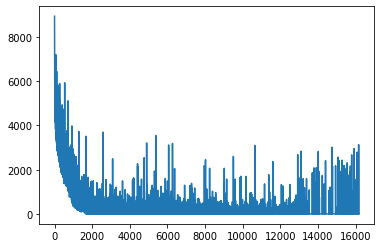

In [237]:
# Now we examine the sales column by plotting
#plt.plot(df.sales); # This gives a graph with indecies on the horizontal axis and sales prices on the vertical axis which is very complicated
sales = ans_df['Future campaigns Projected sales']
plt.plot(sales.values)

# plt.hist(sales.values, size=100)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 5440 to 3530
Data columns (total 22 columns):
campaign_period_sales                16173 non-null float64
customer_number                      16173 non-null float64
historical_sales_volume              16173 non-null float64
number_of_prior_year_transactions    16173 non-null float64
repurchase_method                    16172 non-null object
last_transaction_channel             16173 non-null object
desk                                 16173 non-null int64
executive_chair                      16173 non-null int64
standard_chair                       16173 non-null int64
monitor                              16173 non-null int64
printer                              16173 non-null int64
computer                             16173 non-null int64
insurance                            16173 non-null int64
toner                                16173 non-null int64
office_supplies                      16173 non-null int64
number_of

DECILES

In [217]:
len(ans_df)

16173

In [218]:
ans_df.count()

Customer Number                                           16173
Sales During the Campaign                                 16173
Future campaigns Projected sales                          16173
Probability of Customer Purchasing in Future Campaigns    16173
profit_projections                                        16173
dtype: int64

In [219]:
size = len(df)
size

16173

In [220]:
decile_size = (size//10)
data = dict()
for k in range(10):
    kstart = k*decile_size
    chunk = df.iloc[kstart:kstart + decile_size, : ]
#     display(chunk.tail()) # This shows the last row of the deciles
#     display(chunk.head()) # This shows the first row of the deciles
    data[k] = [len(chunk)//10, np.ptp(chunk.historical_sales_volume), chunk.historical_sales_volume.mean(), chunk.campaign_period_sales.sum(), np.std(chunk.campaign_period_sales), chunk.sales_predicted.sum(), chunk.profit_projections.sum()]
chart = pd.DataFrame(data)

In [222]:
TOTALS = chart.T.number_of_customers.sum(), chart.T.sales_made_during_campaign.sum(), chart.T.future_campaigns_predicted_sales.sum(), chart.T.profit_projections.sum()
TOTALS

(1610.0, 3976645.7544666664, 3978069.8678050465, -416118.7932158683)

In [170]:
# print(type(data))
# data

In [221]:
# chart['TOTALS'] = 
chart.index = ['number_of_customers', 'range_of_historical_sales_volume', 'average_historical_sales_volume', 'sales_made_during_campaign', 'stdv_sales_made_during_campaign', 'future_campaigns_predicted_sales', 'profit_projections']
chart.T

,number_of_customers,range_of_historical_sales_volume,average_historical_sales_volume,sales_made_during_campaign,stdv_sales_made_during_campaign,future_campaigns_predicted_sales,profit_projections
0,161.0,8.470046e+06,6.647850e+05,2.904026e+06,1430.167436,2.904026e+06,206125.802533
1,161.0,6.967692e+06,2.880112e+05,3.253349e+05,285.271639,3.253349e+05,-50632.042267
2,161.0,4.591758e+06,2.960004e+05,1.733444e+05,222.092876,1.733587e+05,-65114.732189
3,161.0,4.068859e+06,3.514934e+05,1.560889e+05,250.937536,1.560889e+05,-66252.041951
4,161.0,4.577291e+06,3.908371e+05,1.153391e+05,180.116962,1.154584e+05,-70019.252245
5,161.0,4.114171e+06,4.221087e+05,8.330911e+04,169.552666,8.330911e+04,-72312.206804
6,161.0,6.378789e+06,4.759247e+05,6.081914e+04,173.285785,6.112127e+04,-73539.495385
7,161.0,5.265240e+06,6.228916e+05,3.598573e+04,144.279105,3.598573e+04,-75368.636355
8,161.0,5.868134e+06,9.792996e+05,4.512084e+04,210.318357,4.554267e+04,-75039.568610
9,161.0,1.645867e+07,2.185061e+06,7.727733e+04,314.503960,7.784383e+04,-73966.619943


In [223]:
TOTALS = chart.T.number_of_customers.sum(), chart.T.sales_made_during_campaign.sum(), chart.T.future_campaigns_predicted_sales.sum(), chart.T.profit_projections.sum()
print(type(TOTALS))

<class 'tuple'>


In [224]:
TOTALS[0], TOTALS[1], TOTALS[2], TOTALS[3]

(1610.0, 3976645.7544666664, 3978069.8678050465, -416118.7932158683)

In [225]:
new_row = pd.Series(data={'number_of_customers':TOTALS[0], 'range_of_historical_sales_volume':'-', 'average_historical_sales_volume':'-', 'sales_made_during_campaign':TOTALS[1], 'stdv_sales_made_during_campaign':'-', 'future_campaigns_predicted_sales': TOTALS[2], 'profit_projections':TOTALS[3]}, name='TOTALS')
#append row to the dataframe
new_chart = chart.T.append(new_row, ignore_index=False)

In [227]:
new_chart

,number_of_customers,range_of_historical_sales_volume,average_historical_sales_volume,sales_made_during_campaign,stdv_sales_made_during_campaign,future_campaigns_predicted_sales,profit_projections
0,161.0,8.47005e+06,664785,2.904026e+06,1430.17,2.904026e+06,206125.802533
1,161.0,6.96769e+06,288011,3.253349e+05,285.272,3.253349e+05,-50632.042267
2,161.0,4.59176e+06,296000,1.733444e+05,222.093,1.733587e+05,-65114.732189
3,161.0,4.06886e+06,351493,1.560889e+05,250.938,1.560889e+05,-66252.041951
4,161.0,4.57729e+06,390837,1.153391e+05,180.117,1.154584e+05,-70019.252245
5,161.0,4.11417e+06,422109,8.330911e+04,169.553,8.330911e+04,-72312.206804
6,161.0,6.37879e+06,475925,6.081914e+04,173.286,6.112127e+04,-73539.495385
7,161.0,5.26524e+06,622892,3.598573e+04,144.279,3.598573e+04,-75368.636355
8,161.0,5.86813e+06,979300,4.512084e+04,210.318,4.554267e+04,-75039.568610
9,161.0,1.64587e+07,2.18506e+06,7.727733e+04,314.504,7.784383e+04,-73966.619943


In [231]:
# DF TO CSV
new_chart.to_csv('LiftChart.csv', sep='\t')

DESCRTIPTIVE STATISTICS

In [142]:
# grab numeric columns
office_supply_df = df.select_dtypes(exclude='object')
office_supply_df.head()

,campaign_period_sales,customer_number,historical_sales_volume,number_of_prior_year_transactions,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,purchaser_or_not,probs,succ_pred,sales_predicted,profit_projections
5440,8936.85,12217085.0,98305.35,45.0,1,0,1,1,1,1,0,0,0,8.0,0,1,8.172963e-07,1,8936.85,-75115.188393
2835,7264.92,6357459.0,784611.36,1.0,0,1,0,0,0,0,0,0,0,8.0,0,1,1.794413e-05,1,7264.92,-61070.949320
8598,7458.75,19112091.0,895050.00,44.0,1,1,1,0,1,0,1,0,1,8.0,0,1,2.211738e-05,1,7458.75,-62699.113707
6803,7382.70,15215071.0,996664.50,44.0,0,0,0,0,0,0,0,0,0,8.0,0,1,2.387320e-05,1,7382.70,-62060.291225
13188,7693.40,29676025.0,1023222.20,41.0,0,1,0,0,0,0,0,0,0,8.0,0,1,2.403757e-05,1,7693.40,-64670.169315


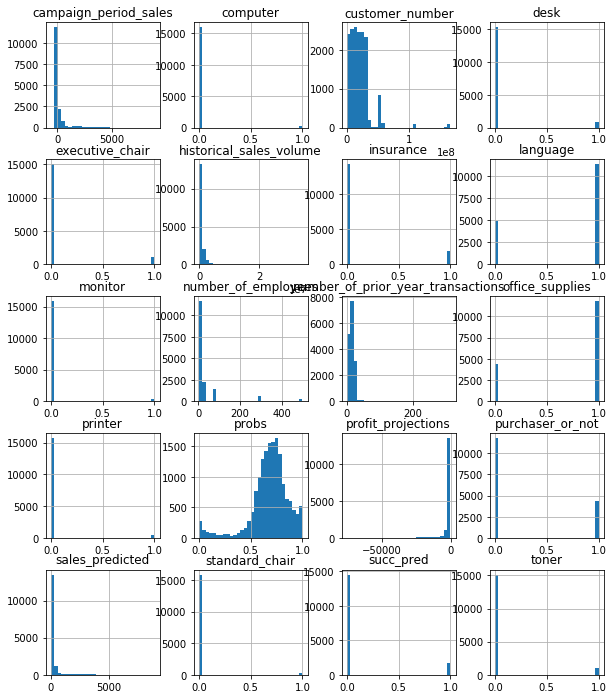

In [143]:
office_supply_df.hist(figsize=(10,12), bins=30);

In [147]:
import seaborn as sns

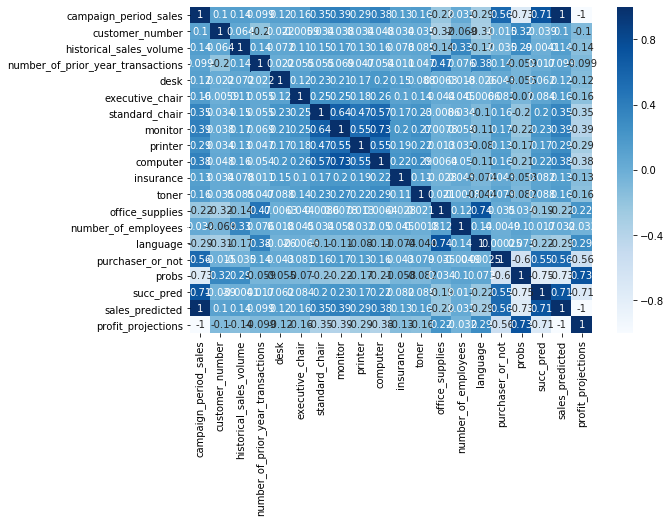

In [148]:
# display(office_supply_df.corr())

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(office_supply_df.corr(), cmap='Blues', annot=True, ax=ax);

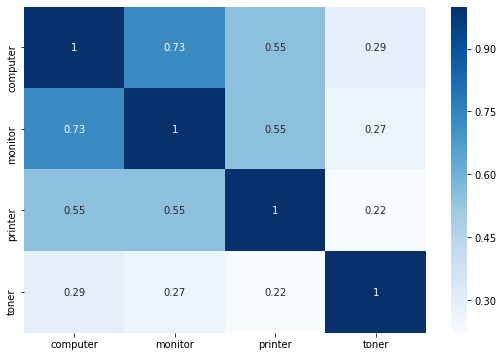

In [191]:
tech_products = ['computer','monitor','printer','toner']
tech_product_df = office_supply_df.loc[:, tech_products]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(tech_product_df.corr(), cmap='Blues', annot=True, ax=ax);

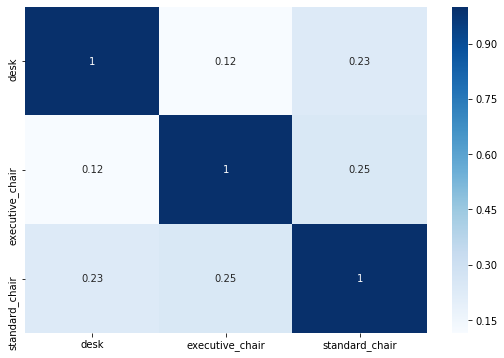

In [192]:
furniture_products = ['desk', 'executive_chair', 'standard_chair']
furniture_products_df = office_supply_df.loc[:, furniture_products]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(furniture_products_df.corr(), cmap='Blues', annot=True, ax=ax);

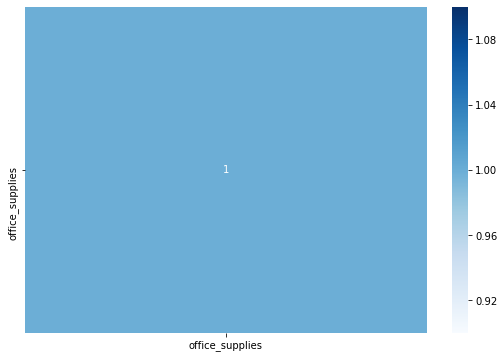

In [193]:
office_suppliez = ['office_supplies']
office_supplies_df = office_supply_df.loc[:, office_suppliez]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(office_supplies_df.corr(), cmap='Blues', annot=True, ax=ax);

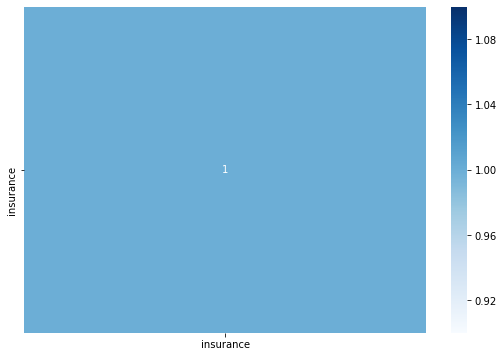

In [194]:
insurance = ['insurance']
insurance_df = office_supply_df.loc[:, insurance]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(insurance_df.corr(), cmap='Blues', annot=True, ax=ax);

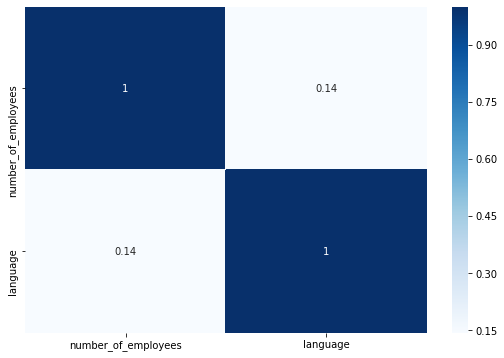

In [195]:
employee_num_plus_language = ['number_of_employees','language']
employee_num_plus_language_df = office_supply_df.loc[:, employee_num_plus_language]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(employee_num_plus_language_df.corr(), cmap='Blues', annot=True, ax=ax);

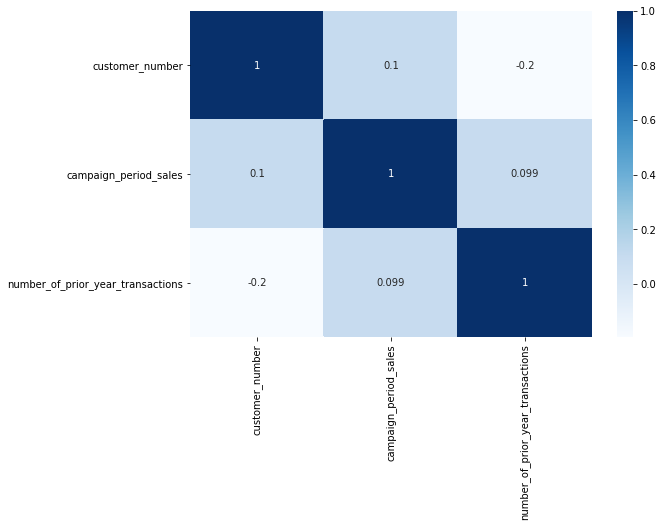

In [238]:
sales_data = ['customer_number','campaign_period_sales','number_of_prior_year_transactions']
sales_data_df = office_supply_df.loc[:, sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

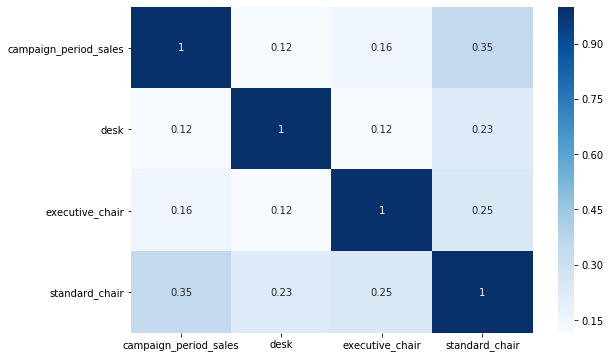

In [239]:
tech_campaign_sales_data = ['campaign_period_sales','desk', 'executive_chair', 'standard_chair']
tech_campaign_sales_data_df = office_supply_df.loc[:, tech_campaign_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(tech_campaign_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

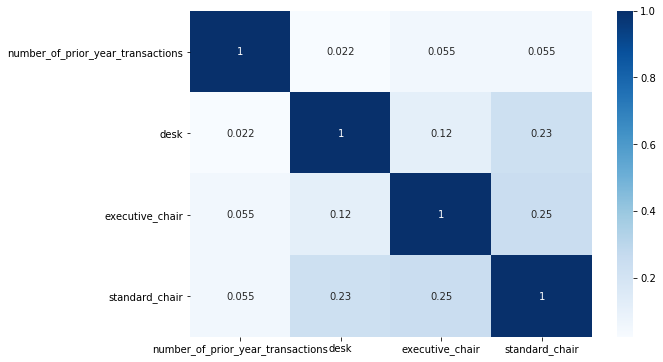

In [240]:
tech_prior_sales_data = ['number_of_prior_year_transactions' ,'desk', 'executive_chair', 'standard_chair']
tech_prior_sales_data_df = office_supply_df.loc[:, tech_prior_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(tech_prior_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

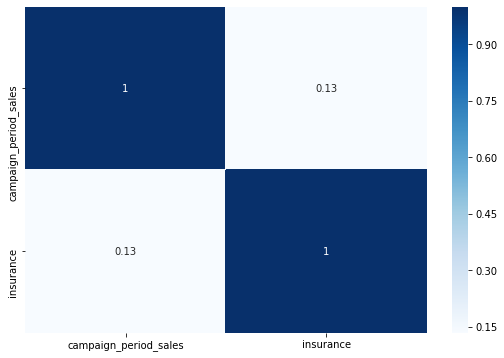

In [241]:
insurance_campaign_sales_data = ['campaign_period_sales','insurance']
insurance_campaign_sales_data_df = office_supply_df.loc[:, insurance_campaign_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(insurance_campaign_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

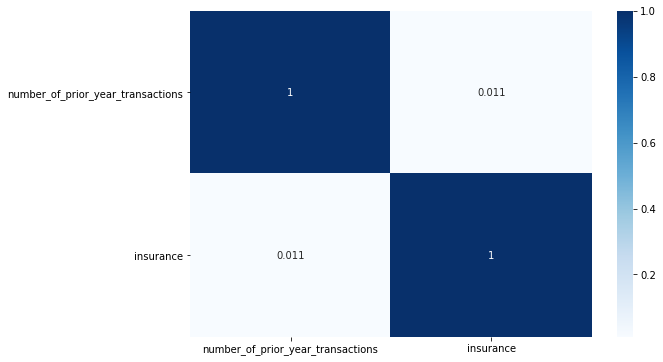

In [242]:
insurance_prior_sales_data = ['number_of_prior_year_transactions' ,'insurance']
insurance_prior_sales_data_df = office_supply_df.loc[:, insurance_prior_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(insurance_prior_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

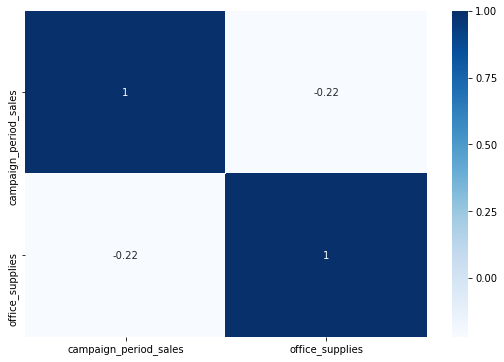

In [243]:
office_suppliez_campaign_sales_data = ['campaign_period_sales','office_supplies']
office_suppliez_campaign_sales_data_df = office_supply_df.loc[:, office_suppliez_campaign_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(office_suppliez_campaign_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);

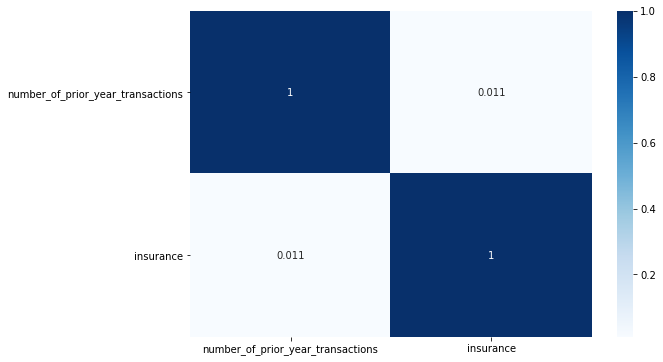

In [244]:
office_suppliez_prior_sales_data = ['number_of_prior_year_transactions' ,'office_supplies']
office_suppliez_prior_sales_data_df = office_supply_df.loc[:, office_suppliez_prior_sales_data]

fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(insurance_prior_sales_data_df.corr(), cmap='Blues', annot=True, ax=ax);